<img src='fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Regression Modelling
<a class="tocSkip">
</h1>
  
</h1>  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Linear Regression Model / Insurance Forecast

In this section, we wish to predict insurance prices based on the variables found in the dataset. For this, first we plot all the variables against each other, in order to get an idea of the relationship that exists between them.

In [2]:
data = pd.read_csv('data/insurance.csv', sep=",", header=0)

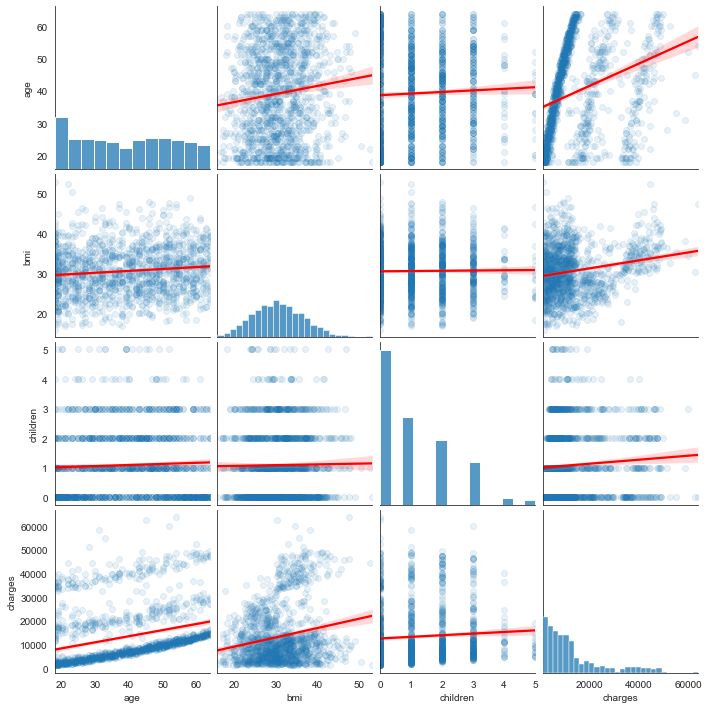

In [3]:
sns.set_style("white")
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

According to the pairplot above, there is some the insurance price is correlated to the age as well as the bmi and age. Thus, these will be the variables that we will analyze. The red line is an automatically calculated regression line with its confidence itervals.

In [4]:
r = np.corrcoef(data.bmi,data.age)
r

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

In [5]:
r = np.corrcoef(data.age,data.charges)
r

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [6]:
r = np.corrcoef(data.bmi,data.charges)
r

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

The strongest correlation occurs between age and charges, although it is not partivularly strong, being of only 0.3. 
If we look at the pairplot between the two variables, it looks like there are 3 lines. This is probably due to the fact that there are different insurance plans with various degrees of coverage. Probably, the lowest and most defined line corrrsponds to the cheapest insurance with lowest coverage and the other two lines correspond to better insurance plans.

## Simple Linear Regression

In [7]:
X = data.age.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = data.charges.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

The regression line is y = 3165.89 + 257.723 x


This means that for every year older, the insurance price increases in 257.723. 

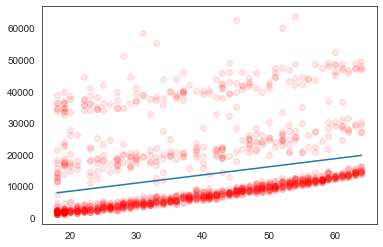

In [8]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro', alpha = 0.1)
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

The image above shows the regression line against the actual dataset. As anticipated in the pairplot, the line falls between the first and second line that most likely represent different insurance plans. Albeit it is the best regression line for the data, it almost never predicts correctly the price of the insurance, although it clearly increases lineraly with age. Since we do not have a column that informs of the insurance plan, this is the best guess we can get. However, in the last section of this notebook we will see what happens if we omit the data that correspond to the most expensive insurance plans and obtain a regression line for the cheapest one.

For the moment, we will evaluate adequacy of the obtained regression line. It is very likely to be inadequate since it clearly does not follow all the four assumptions of linearity, reliability of measurement, homoscedasticity, and normality. The ones that it most clearly does not follow are linearity, since there are three lines, and normality, for the same reason.

In [9]:
model_DF0 = LinearRegression(fit_intercept=True)
X = data.age.values[:, np.newaxis]
Y = data.charges.values
model_DF0 = LinearRegression(fit_intercept=True)
DF0_fit = model_DF0.fit(X, Y)

In [10]:
b1 = DF0_fit.coef_[0]
b0 = DF0_fit.intercept_
print("b0 = {:.6}, b1 = {:.6}".format(b0, b1))

b0 = 3165.89, b1 = 257.723


The coefficients of the linear regression, as we previously saw when we calculated its equation, are b0 = 3165.89, b1 = 257.723.

In [11]:
model_DF0_resid = Y - DF0_fit.predict(X)

In [12]:
# The sample size
n = len(data)
# Uncomment the following line to see that the mean of the residuals is 0
# print(model_DF_resid.mean())
resid_variance = (model_DF0_resid**2).sum() / (n - 2)
print("The residual variance for this data and regression line is {:.6}".format(resid_variance))

The residual variance for this data and regression line is 1.33641e+08


Looking at the residual variance, which is very high, we can tell that the model is not really able to explain the variation in the data. 

In [13]:
b0_variance = resid_variance * (1 / n + X.mean()**2/ ((X - X.mean())**2).sum())
b1_variance = resid_variance / ((n - 1) * X.std(ddof = 1)**2)

b0_se = np.sqrt(b0_variance) 
b1_se = np.sqrt(b1_variance)

print("b0_se = {:.6}".format(b0_se))
print("b1_se = {:.6}".format(b1_se))

b0_se = 937.149
b1_se = 22.5024


In [14]:
alpha = 0.05
talpha = stats.t.isf(alpha / 2, df = n - 2)

CI_beta1 = b1 + np.array([-1, 1]) * talpha * b1_se

print("The confidence interval for the regression model slope is [{:.4}, {:.4}]".format(CI_beta1[0], CI_beta1[1]))

The confidence interval for the regression model slope is [213.6, 301.9]


The confidence interval is very high due to the distribution of the data.

In [68]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(data.age)
model_DF0 = sm.OLS(data.charges, X_1) # OLS comes from Ordinary Least Squares

In [69]:
DF0_fit = model_DF0.fit()

In [71]:
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           4.89e-29
Time:                        18:50:25   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
DF0_fit.pvalues

const    7.506030e-04
age      4.886693e-29
dtype: float64

The p-value is smaller than 0.05. Therefore, we reject the null hypothesis and we confirm that the coefficient is necessary to predict the insurance price. The r2 is 0.089 which means that 8,9% of the variance of the dataset is explained by the model. This is quite a good value for a dataset with such high variance.

We will now calculate the confidence bands of the prediction.

In [73]:
X_new = np.linspace(X.min(), X.max(), 1338)
X_new = sm.add_constant(X_new)

In [76]:
DF0_fit.pred = DF0_fit.get_prediction(X_new)

In [77]:
DF0_fit.pred.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7804.892142,572.371518,6682.047342,8927.736942,-14901.222231,30511.006516
1,7813.759188,571.726194,6692.180347,8935.338029,-14892.292617,30519.810994
2,7822.626234,571.081190,6702.312723,8942.939745,-14883.363105,30528.615573
3,7831.493280,570.436508,6712.444469,8950.542091,-14874.433694,30537.420254
4,7840.360326,569.792148,6722.575582,8958.145069,-14865.504384,30546.225036


In [78]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]
DF0_fit.pred.summary_frame(alpha=0.95).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7804.892142,572.371518,7768.993825,7840.790459,7078.958076,8530.826208
1,7813.759188,571.726194,7777.901345,7849.617031,7087.827122,8539.691254
2,7822.626234,571.081190,7786.808845,7858.443623,7096.696165,8548.556303
3,7831.493280,570.436508,7795.716324,7867.270236,7105.565205,8557.421355
4,7840.360326,569.792148,7804.623783,7876.096869,7114.434242,8566.286410


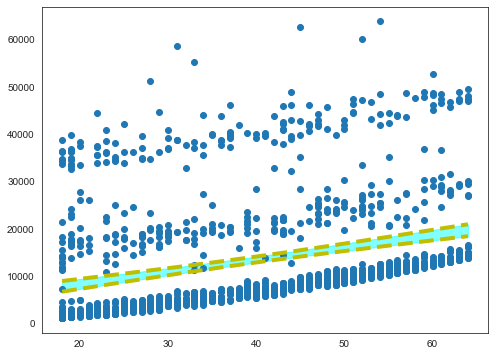

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_low, "y--", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_high, "y--", lw = 4)
ax.fill_between(X_new[:,1], 
                y1 = DF0_fit_confBand_low, 
                y2 = DF0_fit_confBand_high, 
                color='cyan', alpha = 0.5)

In [79]:
# Diagnostic plot
%run ./code/Linear_Reg_Diagnostic.py

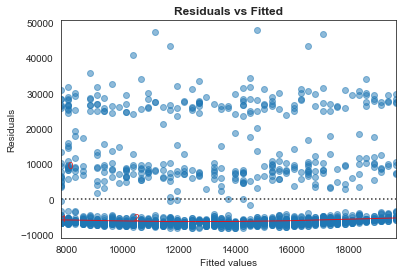

In [75]:
DF0_fit_diagnose = Linear_Reg_Diagnostic(DF0_fit)
DF0_fit_diagnose.residual_plot()
plt.show()

As expected, the residual does not seem to be a random process. We clearly see patterns of distribution of the residual.
We confirm that we have taken wrong model assumptions.

C:\Users\Maria\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


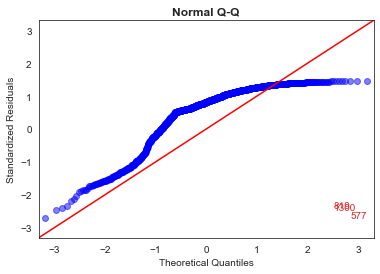

In [25]:
# Residual QQ plot
DF0_fit_diagnose.qq_plot()
plt.show()

The qqplot represents the ideal line of a normal distribution. If the data is normal, it should fall on top of the red line. As expected, the model fails to fit the data.

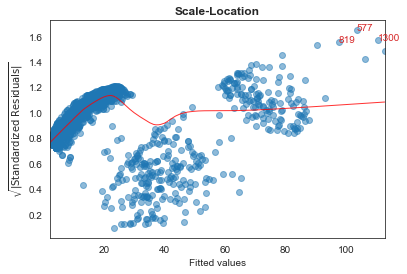

In [26]:
# Scale location plot
DF0_fit_diagnose.scale_location_plot()
plt.show()

Once again, we do not have a randomly distributed residual. It is safe to admit that our model isn't adapted to the data

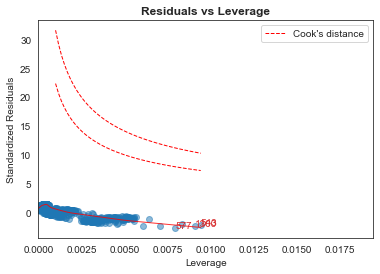

<Figure size 1120x480 with 0 Axes>

In [27]:
DF0_fit_diagnose.leverage_plot()
plt.figure(figsize=(14, 6), dpi=80)
plt.show()

Here no points cross the curves, so we technically have no outliers.

## Polynomial Linear Regression

In this section we will performa polynomial linear regression in order to try to fin a better fit for our data. However, this does not seem to be the problem in our case since it is not apparent that using a parabole in stead of a straight line will give out better results.

In [28]:
X = data.age.values
X2=X**2
Y = data.charges.values

S2=pd.DataFrame(data={'X':X, 'X2':X2, 'Y':Y})

S2.head()

,X,X2,Y
0,19,361,16884.92400
1,18,324,1725.55230
2,28,784,4449.46200
3,33,1089,21984.47061
4,32,1024,3866.85520


In [29]:
# Linear fit
S2_fit = sm.OLS(S2.Y, sm.add_constant(S2[["X", "X2"]])).fit()
S2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     66.50
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.96e-28
Time:                        18:45:56   Log-Likelihood:                -14414.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6508.5527   2699.359      2.411      0.016    1213.105    1.18e+04
X             64.5731    148.001      0.436      0.663    -225.766     354.912
X2             2.4389      1.847      1.320      0.187      -1.185       6.062
==============================================================================
Omnibus:                      401.205   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.169
Skew:                           1.736   Prob(JB):                    6.73e-190
Kurtosis:                       4.888   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The r2 coefficient is 0.09, which means that only this much of the variance is explained by the model. The p-values of x and x2 are above 0.05. Therefore, we cannot reject the null hypothesis and we cannot confirm that these parameters are necessary. From these values, we can confirm that this model is only slighly better than the simple linear one form the section above.

In [30]:
X_new = np.linspace(S2.X.min(), S2.X.max(), 100)
newData = pd.DataFrame({'X':X_new, 'X2':X_new**2})
newData = sm.add_constant(newData)

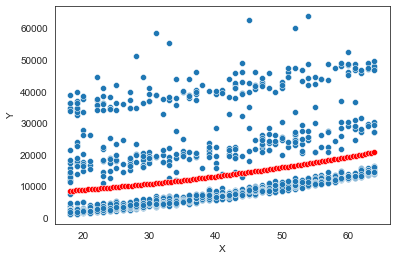

In [31]:
S2_pred = S2_fit.get_prediction(newData)
S2_fitted_new = S2_pred.summary_frame(alpha=0.05)["mean"]
S2_pred.summary_frame()
sns.scatterplot(x = S2.X, y = S2.Y)
sns.scatterplot(x = newData['X'], y = S2_pred.summary_frame()["mean"], color ="red")
plt.show()

The regression line is quite similar to the one obtained in the simple regression model. This suggests that that model is better, since it obtains a very simmilar line with less parameters, thus being more efficient.

## Multivariate regression with variables : Age + BMI ~ Charges

In this section, we will perform a new regression, this time using two variables to calculate the insurance price: age and bmi. This is likely to be a better model than the polynomial regression since both the variables age and bmi are correlated with the variable charges.

In [32]:
data_fit = sm.OLS(data.charges, sm.add_constant(data[["age", "bmi"]])).fit()
data_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           7.39e-37
Time:                        18:45:56   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values are lower than 0.05, therefore the coefficients are necessary to predict the insurance price. However, the r2 value is 0.117, which means that only 11.7 % of the variance is explained. This value is higher than that of the both the simple and the polynomial linear regression, which means that it is better at predicting the price value.

In [33]:
BMI_new = np.arange(data.bmi.min(), data.bmi.max(), 1)
AGE_new = np.repeat(49, len(BMI_new))
newData = pd.DataFrame({'BMI':BMI_new, 'AGE':AGE_new})
newData.head()

,BMI,AGE
0,15.96,49
1,16.96,49
2,17.96,49
3,18.96,49
4,19.96,49


Once again we are able to predict on new data if we wish

In [34]:
newData = sm.add_constant(newData, has_constant='add')
newData.head()

,const,BMI,AGE
0,1.0,15.96,49
1,1.0,16.96,49
2,1.0,17.96,49
3,1.0,18.96,49
4,1.0,19.96,49


In [35]:
data_pred = data_fit.get_prediction(newData)

Here are the model parameters

In [36]:
data_fit.params

const   -6424.804612
age       241.930778
bmi       332.965091
dtype: float64

And here are our pvalues

In [37]:
data_fit.pvalues

const    2.390091e-04
age      2.422136e-26
bmi      1.277594e-10
dtype: float64

As previously stated, the p-value are smaller than 0.05 so we reject the null hypothesis.
There certainly is a correlation between these variables.

## Regression for just one insurance plan

In this section we will alter the dataset to omit the data that are most likely to belong to more expensive insurance plans and we will perform a regression only on what we assume is the cheapest one. For this, we take the regression line calculated in the simple linear regression (y = 3165.89 + 257.723 x), which falls in the middle between the first and second lines, and omit all the data that falls above it.

In [38]:
data_plan1 = data[data.charges < (3165.89 + 257.723*data.age)]
data_plan1.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


<AxesSubplot: xlabel='age', ylabel='charges'>

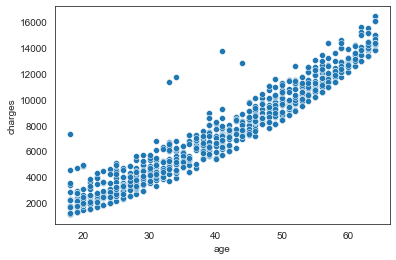

In [39]:
sns.scatterplot(x = data_plan1.age, y = data_plan1.charges)

Looking at the plot, this looks like a polynomial linear regression. We will perform one on the data and see whether we obtain better results than in the sections above.

In [40]:
X = data_plan1.age.values
X2=X**2
Y = data_plan1.charges.values

S2=pd.DataFrame(data={'X':X, 'X2':X2, 'Y':Y})

S2.head()

,X,X2,Y
0,18,324,1725.5523
1,28,784,4449.4620
2,32,1024,3866.8552
3,31,961,3756.6216
4,46,2116,8240.5896


In [41]:
# Linear fit
S2_fit = sm.OLS(S2.Y, sm.add_constant(S2[["X", "X2"]])).fit()
S2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     9169.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:45:57   Log-Likelihood:                -7938.6
No. Observations:                 970   AIC:                         1.588e+04
Df Residuals:                     967   BIC:                         1.590e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -887.1472    239.656     -3.702      0.000   -1357.453    -416.841
X            117.7663     13.126      8.972      0.000      92.007     143.526
X2             1.8995      0.164     11.599      0.000       1.578       2.221
==============================================================================
Omnibus:                      501.450   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5515.258
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      13.891   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The r2 coefficient is 0.95, which means that 95% of the variance is explained by the model. The p-values of x and x2 are below 0.05. Therefore, we reject the null hypothesis and we confirm that these parameters are necessary. From these values, we can confirm that this model is extremely accurate, a lot more than the simple linear one form the first section.

In [42]:
X_new = np.linspace(S2.X.min(), S2.X.max(), 100)
newData = pd.DataFrame({'X':X_new, 'X2':X_new**2})
newData = sm.add_constant(newData)

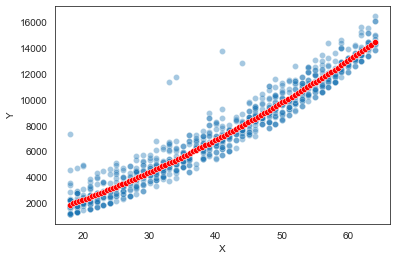

In [43]:
S2_pred = S2_fit.get_prediction(newData)
S2_fitted_new = S2_pred.summary_frame(alpha=0.05)["mean"]
S2_pred.summary_frame()
sns.scatterplot(x = S2.X, y = S2.Y, alpha = 0.4)
sns.scatterplot(x = newData['X'], y = S2_pred.summary_frame()["mean"], color ="red")
plt.show()

As predicted, the regression line adjusts very well to the data.

In [44]:
# Diagnostic plot
%run ./code/Linear_Reg_Diagnostic.py

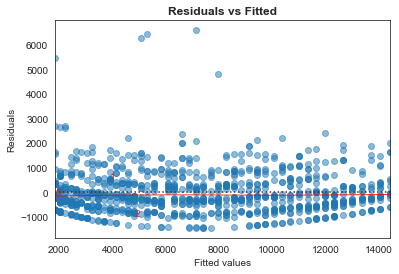

In [45]:
DF0_fit_diagnose = Linear_Reg_Diagnostic(S2_fit)
DF0_fit_diagnose.residual_plot()
plt.show()

As expected, the residual does not seem to be a random process. We clearly see patterns of distribution of the residual.
We confirm that we have taken wrong model assumptions.

C:\Users\Maria\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


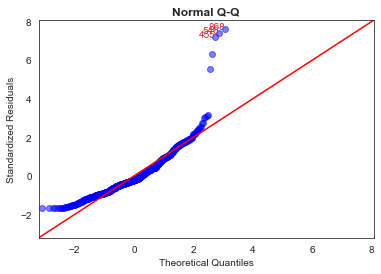

In [46]:
# Residual QQ plot
DF0_fit_diagnose.qq_plot()
plt.show()

The points fall along a line in the middle of the graph, but curve off in the extremities. Normal Q-Q plots that exhibit this behavior usually mean your data has more extreme values than would be expected if they truly came from a Normal distribution.

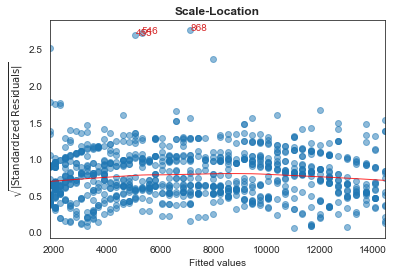

In [47]:
# Scale location plot
DF0_fit_diagnose.scale_location_plot()
plt.show()

This graph shows if there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted. It does not seem that the residuals are evenly distributed. This probably means that the model does not follow at least one of the assumptions.

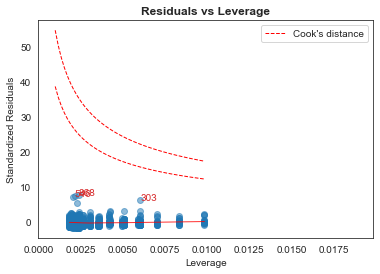

<Figure size 1120x480 with 0 Axes>

In [48]:
DF0_fit_diagnose.leverage_plot()
plt.figure(figsize=(14, 6), dpi=80)
plt.show()

Once again, there no points cross the curves, so there are no outliers.

Since the resiuduals look polynomial, we will check whether a linear model is a better fit. Is the r2 is simmilar but the residuals are more evenly distributed, it will mean that it adjusts better to the dataset.

In [94]:
X = data_plan1.age
Y = data_plan1.charges
X = X[:, np.newaxis]

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

The regression line is y = -3494.34 + 268.26 x


<ipython-input-94-5e4d3710a652>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


In [95]:
X_1 = sm.add_constant(X)
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
DF0_fit = model_DF0.fit()
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.600e+04
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:59:12   Log-Likelihood:                -8001.7
No. Observations:                 970   AIC:                         1.601e+04
Df Residuals:                     968   BIC:                         1.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3494.3397     88.668    -39.409      0.000   -3668.342   -3320.337
x1           268.2599      2.121    126.476      0.000     264.098     272.422
==============================================================================
Omnibus:                      375.856   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2659.858
Skew:                           1.601   Prob(JB):                         0.00
Kurtosis:                      10.454   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 is only sightly lower than that of the polynomial model.

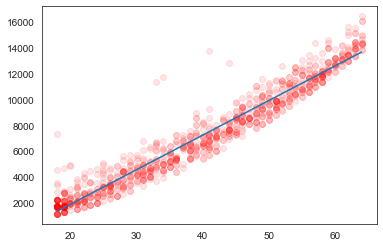

In [97]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro', alpha = 0.1)
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

As expected, the regression line adjusts well to the data, although the polynomial line looks like a better fit.

In [113]:
# Diagnostic plot
%run ./code/Linear_Reg_Diagnostic.py

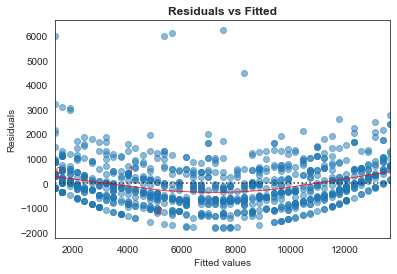

In [114]:
DF0_fit_diagnose = Linear_Reg_Diagnostic(DF0_fit)
DF0_fit_diagnose.residual_plot()
plt.show()

As expected, the residual does not seem to be a random process. We clearly see patterns of distribution of the residual.
We confirm that wresiduals look even less random than those of the polynomial regression. Therefore, this model looks worse.

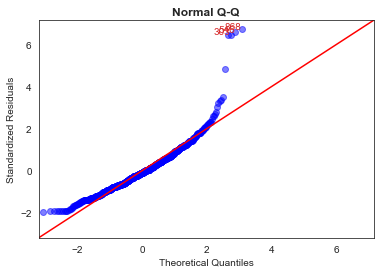

In [110]:
# Residual QQ plot
DF0_fit_diagnose.qq_plot()
plt.show()

The points fall along a line in the middle of the graph, but curve off in the extremities. Normal Q-Q plots that exhibit this behavior usually mean your data has more extreme values than would be expected if they truly came from a Normal distribution.

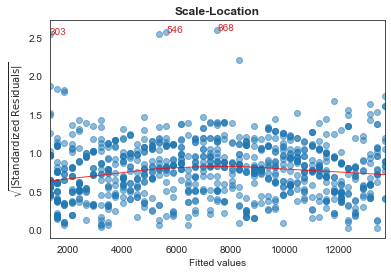

In [111]:
# Scale location plot
DF0_fit_diagnose.scale_location_plot()
plt.show()

Again, the residuals do not seem to follow a random distribution.

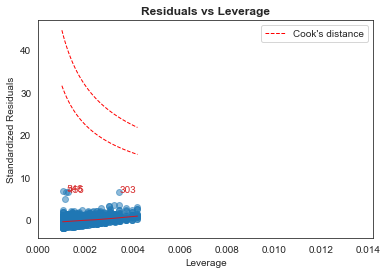

<Figure size 1120x480 with 0 Axes>

In [115]:
DF0_fit_diagnose.leverage_plot()
plt.figure(figsize=(14, 6), dpi=80)
plt.show()

Once again, there no points cross the curves, so there are no outliers.

## Conclusions

After conducting simple, plolynomial and multivariate linear regressions, the most important lesson we can take is that we are clearly missing a variable in the dataset. It is quite likely that this variable is the insurance plan, since plans with higher coverage are usually more expensive. Due to this, the regression does not work wee with the full dataset. However, if we take what we assume is one of the plans, the regression achieves a r2 of 0.95 in a polynomial regression, which means that it adjusts very well to the dataset. The residuals, however, are not absolutely randomly distributed, which means that there are other variables that influence them that we are not accounting for. Nevertheless, the model seems good enough to achieve its goal.